<a href="https://colab.research.google.com/github/mertylcndg/Introduction_to_Machine_Learning/blob/main/One_vs_One_Sign_Language_Digits_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
x = np.load("/content/drive/MyDrive/Data/archive (5)/Sign-language-digits-dataset/X.npy")
Y = np.load("/content/drive/MyDrive/Data/archive (5)/Sign-language-digits-dataset/Y.npy")

(-0.5, 63.5, 63.5, -0.5)

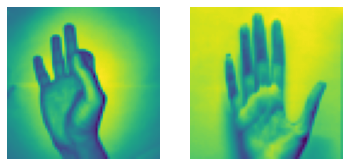

In [3]:
img_size = 64 
plt.subplot(1, 2, 1)
plt.imshow(x[0].reshape(img_size, img_size))
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(x[-1].reshape(img_size, img_size))
plt.axis('off')

In [4]:
Y[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [5]:
label_list = []
for i in range(0,len(Y)):
  for j in range(0,10):
    if Y[i,j]== 1:
      label_list.append(j)
label_list = np.array(label_list)

In [6]:
label_list

array([0, 0, 0, ..., 9, 9, 9])

In [7]:
#Y[:,0]==1

In [8]:
from sklearn.metrics import accuracy_score
number = [0,1,2,3,4,5,6,7,8,9]
prediction= []
y_pred = []
y_test_matris=[]
score_list=[]
for j in number:
  for i in number:
    if j != i and j<i :
      print("for {} to {}".format(j,i))

      import numpy as np

      train_filter = np.where((Y[:,j]==1 ) | ( Y[:,i]== 1  ))
      X_train_two_number= x[train_filter]
      y = label_list[train_filter]

  
      from sklearn.model_selection import train_test_split
      X_train, X_test, Y_train, Y_test = train_test_split(X_train_two_number, y, test_size=0.15, random_state=42) 
      y_test_matris.append(Y_test)
      x_train_flat = X_train.reshape(len(X_train),(64*64))
      x_test_flat = X_test.reshape(len(X_test),(64*64))


      from sklearn import linear_model
      logreg = linear_model.LogisticRegression(solver='lbfgs', max_iter=500)
  
      logreg.fit(x_train_flat, Y_train)
      prediction.append(logreg.predict(x_test_flat))
      y_pred.append(Y_test)
      print("test accuracy: {} ".format(logreg.score(x_test_flat, Y_test)))
      score_list.append(logreg.score(x_test_flat, Y_test))
  y_predicted_labels = [i for i in prediction]

for 0 to 1
test accuracy: 0.9516129032258065 
for 0 to 2
test accuracy: 0.9838709677419355 
for 0 to 3
test accuracy: 0.9354838709677419 
for 0 to 4
test accuracy: 0.967741935483871 
for 0 to 5
test accuracy: 0.9032258064516129 
for 0 to 6
test accuracy: 0.9032258064516129 
for 0 to 7
test accuracy: 0.9354838709677419 
for 0 to 8
test accuracy: 0.967741935483871 
for 0 to 9
test accuracy: 0.9193548387096774 
for 1 to 2
test accuracy: 0.9193548387096774 
for 1 to 3
test accuracy: 1.0 
for 1 to 4
test accuracy: 0.9516129032258065 
for 1 to 5
test accuracy: 1.0 
for 1 to 6
test accuracy: 0.967741935483871 
for 1 to 7
test accuracy: 0.9354838709677419 
for 1 to 8
test accuracy: 0.967741935483871 
for 1 to 9
test accuracy: 1.0 
for 2 to 3
test accuracy: 0.9032258064516129 
for 2 to 4
test accuracy: 0.9838709677419355 
for 2 to 5
test accuracy: 0.9365079365079365 
for 2 to 6
test accuracy: 0.8870967741935484 
for 2 to 7
test accuracy: 1.0 
for 2 to 8
test accuracy: 0.9516129032258065 
for 2 

In [9]:
score_list = np.array(score_list)
score_list

array([0.9516129 , 0.98387097, 0.93548387, 0.96774194, 0.90322581,
       0.90322581, 0.93548387, 0.96774194, 0.91935484, 0.91935484,
       1.        , 0.9516129 , 1.        , 0.96774194, 0.93548387,
       0.96774194, 1.        , 0.90322581, 0.98387097, 0.93650794,
       0.88709677, 1.        , 0.9516129 , 0.98387097, 1.        ,
       0.93650794, 0.80952381, 0.9516129 , 0.91935484, 0.98412698,
       0.95238095, 0.98387097, 0.98387097, 0.9516129 , 1.        ,
       0.98412698, 0.96825397, 0.96825397, 1.        , 0.9516129 ,
       0.96774194, 0.96825397, 0.9516129 , 0.9516129 , 1.        ])

In [10]:
l1= np.arange(1,46)
d1=zip(l1,score_list)
score_dict = dict(d1)
score_dict

{1: 0.9516129032258065,
 2: 0.9838709677419355,
 3: 0.9354838709677419,
 4: 0.967741935483871,
 5: 0.9032258064516129,
 6: 0.9032258064516129,
 7: 0.9354838709677419,
 8: 0.967741935483871,
 9: 0.9193548387096774,
 10: 0.9193548387096774,
 11: 1.0,
 12: 0.9516129032258065,
 13: 1.0,
 14: 0.967741935483871,
 15: 0.9354838709677419,
 16: 0.967741935483871,
 17: 1.0,
 18: 0.9032258064516129,
 19: 0.9838709677419355,
 20: 0.9365079365079365,
 21: 0.8870967741935484,
 22: 1.0,
 23: 0.9516129032258065,
 24: 0.9838709677419355,
 25: 1.0,
 26: 0.9365079365079365,
 27: 0.8095238095238095,
 28: 0.9516129032258065,
 29: 0.9193548387096774,
 30: 0.9841269841269841,
 31: 0.9523809523809523,
 32: 0.9838709677419355,
 33: 0.9838709677419355,
 34: 0.9516129032258065,
 35: 1.0,
 36: 0.9841269841269841,
 37: 0.9682539682539683,
 38: 0.9682539682539683,
 39: 1.0,
 40: 0.9516129032258065,
 41: 0.967741935483871,
 42: 0.9682539682539683,
 43: 0.9516129032258065,
 44: 0.9516129032258065,
 45: 1.0}

In [11]:
sorted_keys = sorted(score_dict,key=score_dict.get)
sorted_dict = {}
for w in sorted_keys[:5]:
    sorted_dict[w] = score_dict[w]
sorted_dict

{5: 0.9032258064516129,
 6: 0.9032258064516129,
 18: 0.9032258064516129,
 21: 0.8870967741935484,
 27: 0.8095238095238095}

In [12]:
cm = []
index_list =[26,20,17,5,4]
for i in index_list:
  cm.append(tf.math.confusion_matrix(labels=y_test_matris[i],predictions=y_predicted_labels[i]))
cm

[<tf.Tensor: shape=(7, 7), dtype=int32, numpy=
 array([[ 0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0, 28,  0,  0,  5],
        [ 0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  7,  0,  0, 23]], dtype=int32)>,
 <tf.Tensor: shape=(7, 7), dtype=int32, numpy=
 array([[ 0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0],
        [ 0,  0, 28,  0,  0,  0,  3],
        [ 0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  4,  0,  0,  0, 27]], dtype=int32)>,
 <tf.Tensor: shape=(4, 4), dtype=int32, numpy=
 array([[ 0,  0,  0,  0],
        [ 0,  0,  0,  0],
        [ 0,  0, 29,  2],
        [ 0,  0,  4, 27]], dtype=int32)>,
 <tf.Tensor: shape=(7, 7), dtype=int32, numpy=
 array([[33,  0,  0,  0,  0,  0,  5],
        [ 0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0],
        [ 0,  

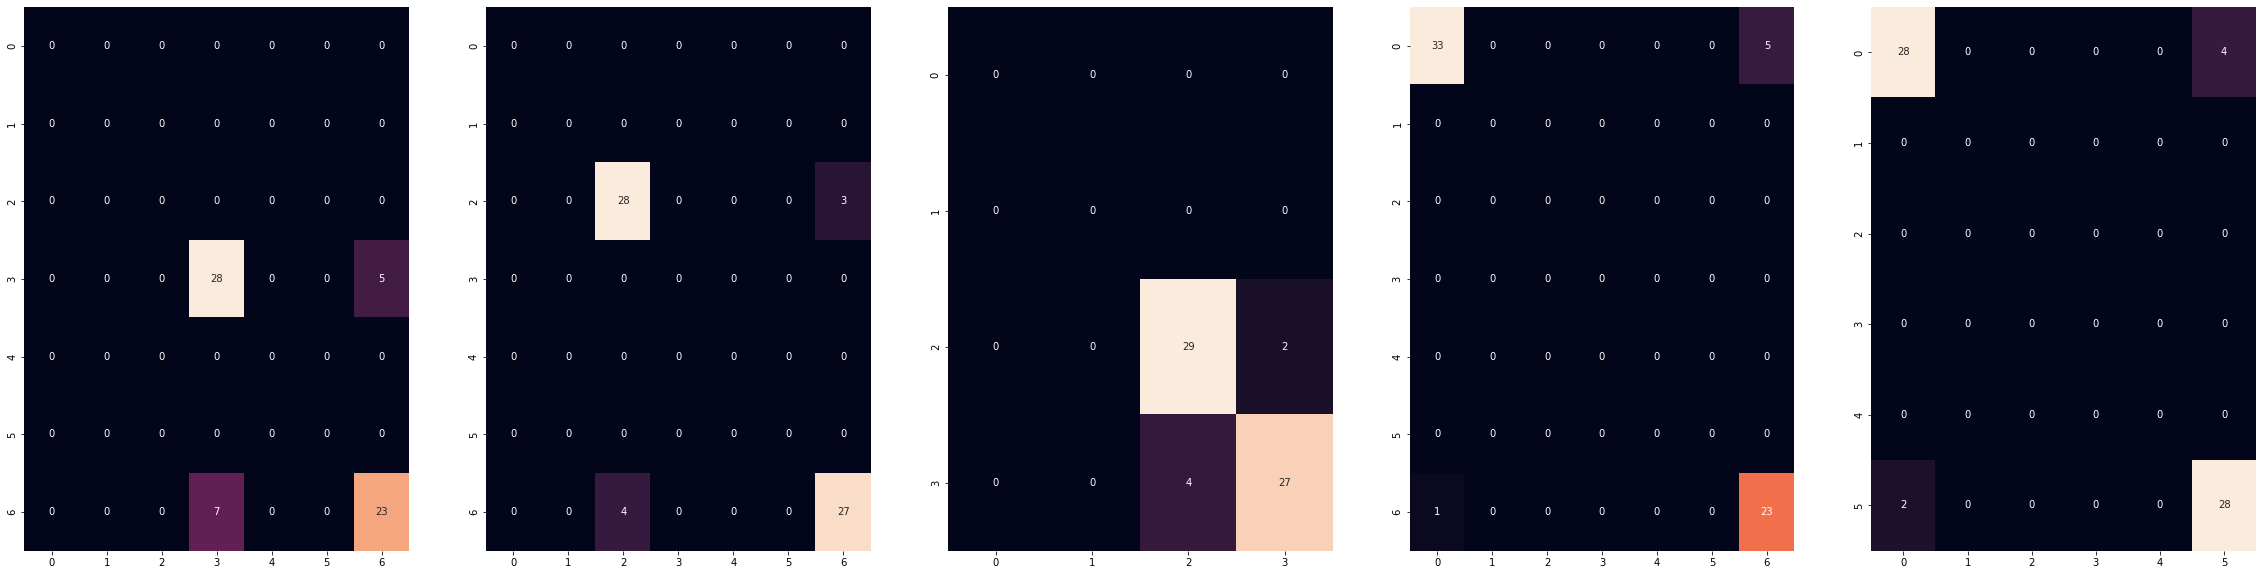

In [13]:
# 
fig, axs = plt.subplots(ncols=5,figsize=(40,10))

sns.heatmap(cm[0], annot=True, cbar=False, ax=axs[0])
sns.heatmap(cm[1], annot=True, cbar=False, ax=axs[1])
sns.heatmap(cm[2], annot=True, cbar=False, ax=axs[2])
sns.heatmap(cm[3], annot=True, cbar=False, ax=axs[3])
sns.heatmap(cm[4], annot=True, cbar=False, ax=axs[4])